## Name: Vaibhav Bichave

## Object detection using Transfer Learning of CNN architectures for the given (image dataset) using the below steps:
    a.Load in a pre-trained CNN model trained on a large dataset
    b.Freeze parameters (weights) in model's lower convolutional layers
    c.Add custom classifier with several layers of trainable parameters to model
    d.Train classifier layers on training data available for task
    e.Fine-tune hyper parameters and unfreeze more layers as needed 

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import UpSampling2D,Dense,Input,Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
base_model = InceptionV3(include_top=False,weights='imagenet', 
                         input_shape=(128, 128, 3),pooling='avg')

for layer in base_model.layers: 
   layer.trainable = False

2023-11-16 02:50:04.364904: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-16 02:50:04.364947: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-16 02:50:04.364966: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-16 02:50:04.365164: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-16 02:50:04.365606: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
inputlayer = Input(shape=(32, 32, 3))
model = Sequential([
    inputlayer,
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    base_model,
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')   
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_2 (UpSamplin  (None, 64, 64, 3)         0         
 g2D)                                                            
                                                                 
 up_sampling2d_3 (UpSamplin  (None, 128, 128, 3)       0         
 g2D)                                                            
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 flatten (Flatten)           (None, 32)                0

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [9]:
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1)

2023-11-16 02:50:14.299735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 133s 84ms/step - loss: 1.3315 - accuracy: 0.6223 - val_loss: 1.0558 - val_accuracy: 0.6850


In [10]:
prediction = model.predict(X_test)

313/313 [==============================] - 22s 68ms/step


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.72      0.81      0.76      1000
           2       0.81      0.55      0.66      1000
           3       0.45      0.75      0.56      1000
           4       0.70      0.58      0.64      1000
           5       0.75      0.52      0.62      1000
           6       0.75      0.68      0.72      1000
           7       0.79      0.75      0.77      1000
           8       0.64      0.81      0.71      1000
           9       0.87      0.64      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



In [13]:
for layer in base_model.layers: 
   layer.trainable = False
for layer in base_model.layers[len(base_model.layers)-2:]: 
   layer.trainable = True
inputlayer = Input(shape=(32, 32, 3))
model = Sequential([
    inputlayer,
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    base_model,
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')   
])
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2)

Epoch 1/2
1563/1563 [==============================] - 141s 88ms/step - loss: 1.4722 - accuracy: 0.6102 - val_loss: 1.2872 - val_accuracy: 0.6483
Epoch 2/2
1563/1563 [==============================] - 140s 90ms/step - loss: 1.0245 - accuracy: 0.6950 - val_loss: 0.9600 - val_accuracy: 0.7052


313/313 [==============================] - 21s 66ms/step
8 1


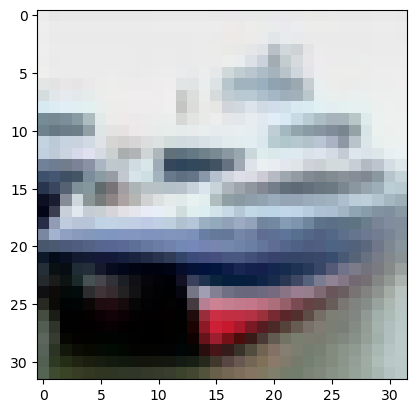

8 8


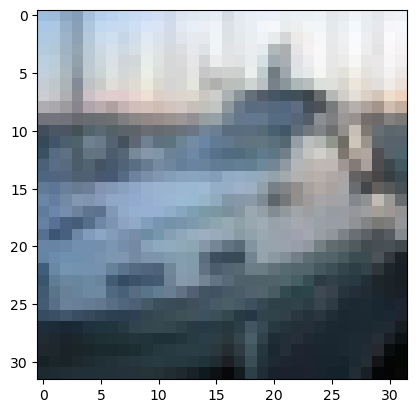

0 0


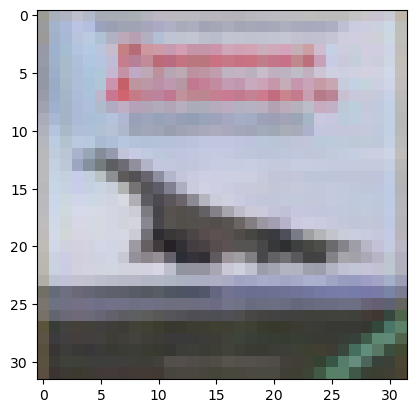

6 6


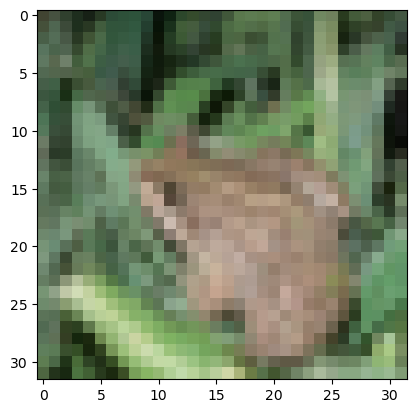

6 6


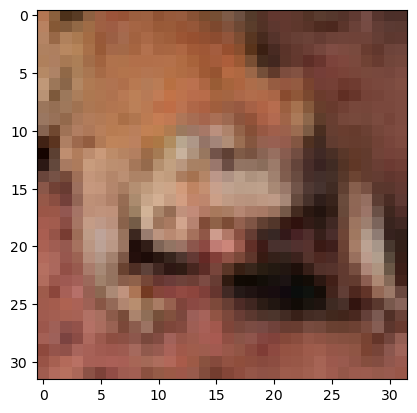

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
predictions = model.predict(X_test)

def Display_imag(n):
    act = y_test[n]
    pred = np.argmax(predictions[n])
    plt.imshow(X_test[n])
    print(act,pred)
    plt.show()
    
Display_imag(1)
Display_imag(2)
Display_imag(3)
Display_imag(4)
Display_imag(5)